In [110]:
!pip install pandas matplotlib seaborn yfinance
!pip install plotly

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import plotly.express as px

In [127]:
# Download data for Infosys Limited
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2023-12-31")

# Reset the index to access 'Date'
stock_data.reset_index(inplace=True)

[*********************100%***********************]  1 of 1 completed


## **Closing Price with Moving Averages**

In [113]:
# Calculate 20-day and 50-day moving averages
stock_data['20-Day MA'] = stock_data['Close'].rolling(window=20).mean()
stock_data['50-Day MA'] = stock_data['Close'].rolling(window=50).mean()

# Display the few rows
print(stock_data[['Date', 'Close', '20-Day MA', '50-Day MA']].head())

Price        Date       Close 20-Day MA 50-Day MA
Ticker                INFY.NS                    
0      2020-01-01  661.205200       NaN       NaN
1      2020-01-02  659.275940       NaN       NaN
2      2020-01-03  669.415771       NaN       NaN
3      2020-01-06  662.999817       NaN       NaN
4      2020-01-07  653.174011       NaN       NaN


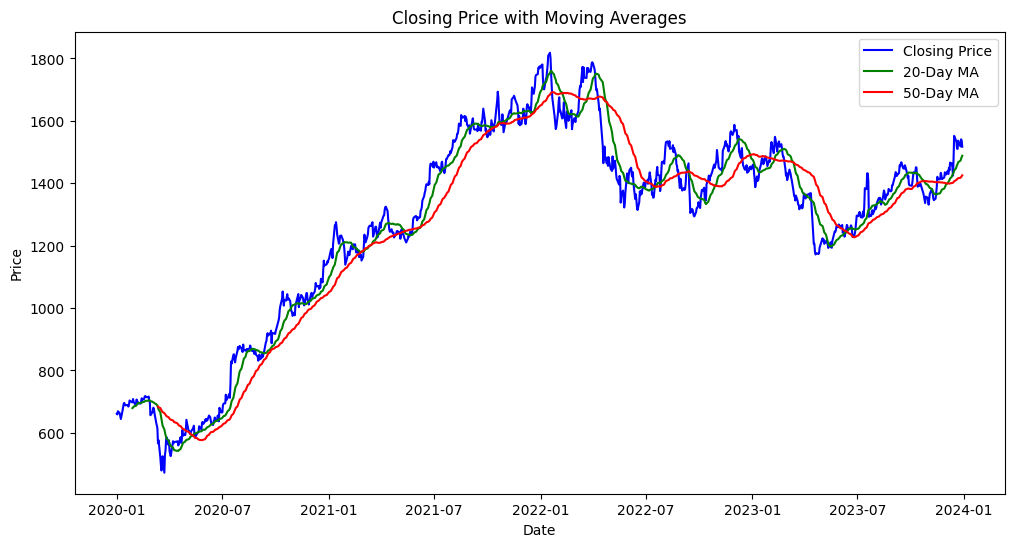

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color="blue")
plt.plot(stock_data['Date'], stock_data['20-Day MA'], label="20-Day MA", color="green")
plt.plot(stock_data['Date'], stock_data['50-Day MA'], label="50-Day MA", color="red")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Closing Price with Moving Averages")
plt.legend()
plt.show()

## **Buy and Sell Signals**

In [116]:
# Create a signal column for buy (1) and sell (-1)
stock_data['Signal'] = 0
stock_data.loc[stock_data['20-Day MA'] > stock_data['50-Day MA'], 'Signal'] = 1
stock_data.loc[stock_data['20-Day MA'] < stock_data['50-Day MA'], 'Signal'] = -1

# Display relevant columns
print(stock_data[['Date', '20-Day MA', '50-Day MA', 'Signal']].tail())

Price        Date    20-Day MA    50-Day MA Signal
Ticker                                            
987    2023-12-22  1467.336206  1416.204714      1
988    2023-12-26  1472.574207  1417.554563      1
989    2023-12-27  1478.689716  1419.920664      1
990    2023-12-28  1483.755658  1422.866086      1
991    2023-12-29  1488.069446  1425.364907      1


## **Crossover Strategy with Buy and Sell Signals**

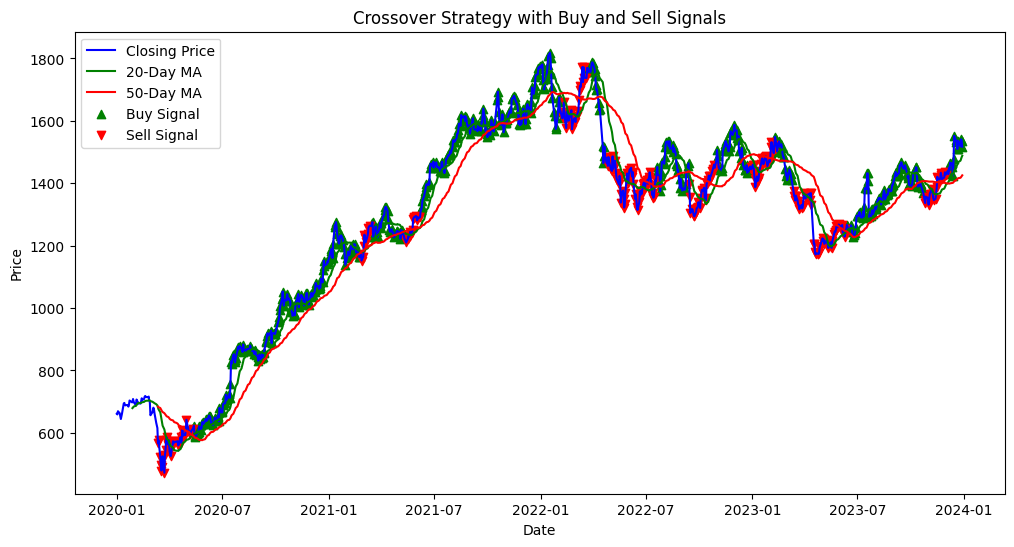

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color="blue")
plt.plot(stock_data['Date'], stock_data['20-Day MA'], label="20-Day MA", color="green")
plt.plot(stock_data['Date'], stock_data['50-Day MA'], label="50-Day MA", color="red")

# Highlight crossover points
buy_signals = stock_data[stock_data['Signal'] == 1]
sell_signals = stock_data[stock_data['Signal'] == -1]

plt.scatter(buy_signals['Date'], buy_signals['Close'], label="Buy Signal", color="green", marker="^", alpha=1)
plt.scatter(sell_signals['Date'], sell_signals['Close'], label="Sell Signal", color="red", marker="v", alpha=1)

plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Crossover Strategy with Buy and Sell Signals")
plt.legend()
plt.show()

In [105]:
# Extract buy and sell signal dates and prices
buy_signals = stock_data[stock_data['Signal'] == 1][['Date', 'Close']]
sell_signals = stock_data[stock_data['Signal'] == -1][['Date', 'Close']]

print("Buy Signals:\n", buy_signals)
print("\nSell Signals:\n", sell_signals)

Buy Signals:
 Price        Date        Close
Ticker                 INFY.NS
87     2020-05-12   617.056030
88     2020-05-13   622.888916
89     2020-05-14   590.584534
90     2020-05-15   585.335083
91     2020-05-18   595.744263
..            ...          ...
987    2023-12-22  1536.644409
988    2023-12-26  1518.012817
989    2023-12-27  1540.773926
990    2023-12-28  1536.398682
991    2023-12-29  1516.980469

[641 rows x 2 columns]

Sell Signals:
 Price        Date        Close
Ticker                 INFY.NS
49     2020-03-12   566.401184
50     2020-03-13   576.406494
51     2020-03-16   523.283997
52     2020-03-17   497.978943
53     2020-03-18   479.448914
..            ...          ...
968    2023-11-24  1413.252808
969    2023-11-28  1418.463745
970    2023-11-29  1435.079834
971    2023-11-30  1430.704712
972    2023-12-01  1427.902466

[302 rows x 2 columns]


In [118]:
stock_data.to_csv("infosys_stock_analysis.csv", index=False)

## **Stock Price with Moving Averages**

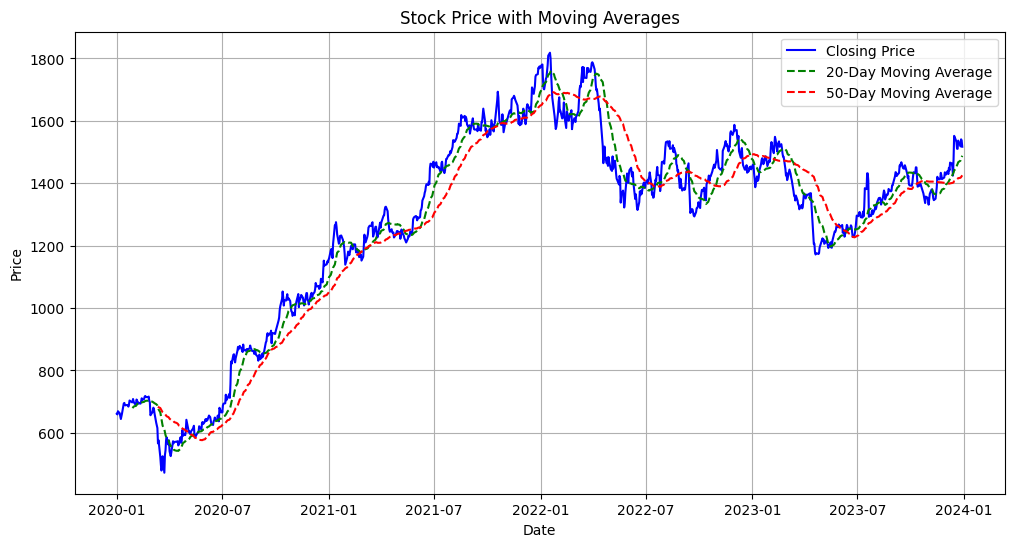

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the processed stock data
stock_data = pd.read_csv("infosys_stock_analysis.csv")

# Convert 'Date' to a datetime object for better handling
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Ensure data is sorted by date
stock_data = stock_data.sort_values(by='Date')

# Convert 'Close' column to numeric, handling potential errors
stock_data['Close'] = pd.to_numeric(stock_data['Close'], errors='coerce')

# Calculate 30-Day Rolling Volatility and add it to the DataFrame
stock_data['30-Day Volatility'] = stock_data['Close'].rolling(window=30).std() * 100  # Multiply by 100 to express as percentage

# Graphical Representation

# 1. Closing Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color="blue", linewidth=1.5)
plt.plot(stock_data['Date'], stock_data['20-Day MA'], label="20-Day Moving Average", color="green", linestyle="--")
plt.plot(stock_data['Date'], stock_data['50-Day MA'], label="50-Day Moving Average", color="red", linestyle="--")

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

## **Buy and Sell Signals**

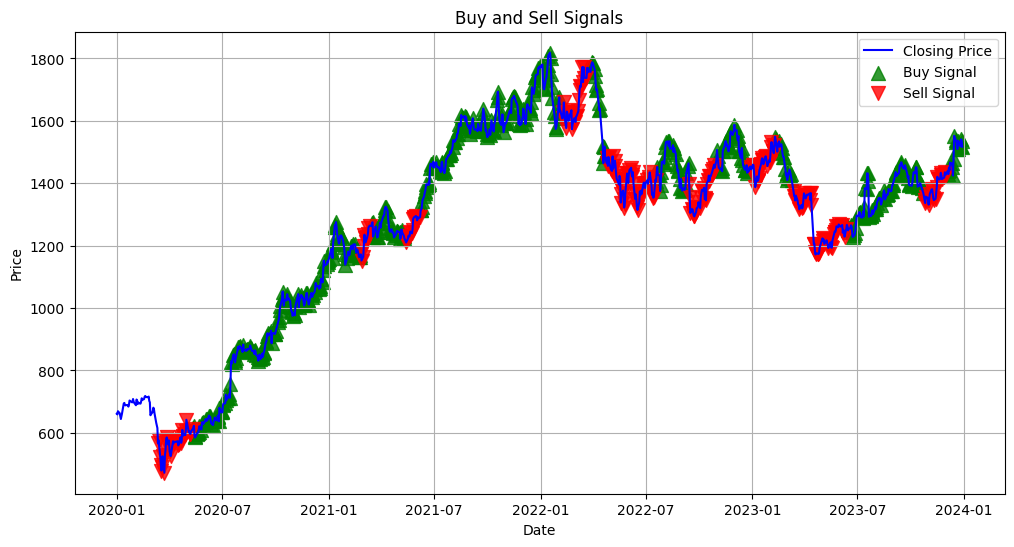

In [120]:
# 2. Buy/Sell Signals
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Close'], label="Closing Price", color="blue", linewidth=1.5)

# Highlight buy and sell signals
buy_signals = stock_data[stock_data['Signal'] == 1]
sell_signals = stock_data[stock_data['Signal'] == -1]
plt.scatter(buy_signals['Date'], buy_signals['Close'], label="Buy Signal", color="green", marker="^", s=100, alpha=0.8)
plt.scatter(sell_signals['Date'], sell_signals['Close'], label="Sell Signal", color="red", marker="v", s=100, alpha=0.8)

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Buy and Sell Signals")
plt.legend()
plt.grid(True)
plt.show()

## **Daily Percentage Change Histogram**

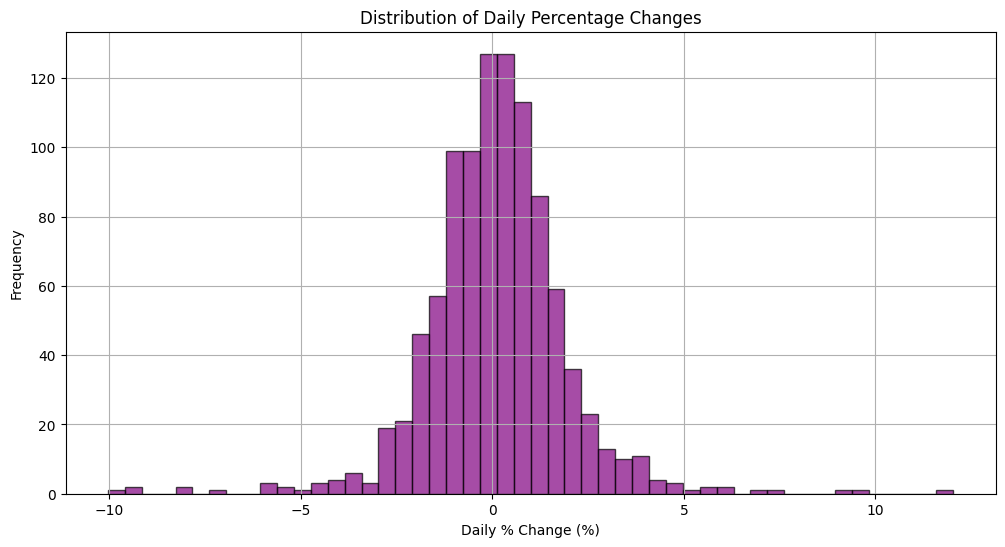

In [135]:
# 3. Daily Percentage Change Histogram
plt.figure(figsize=(12, 6))
# Plot the histogram using the newly calculated column
plt.hist(stock_data['Daily % Change'], bins=50, color="purple", edgecolor="black", alpha=0.7)
plt.xlabel("Daily % Change (%)")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Percentage Changes")
plt.grid(True)
plt.show()

## **Rolling Volatility**

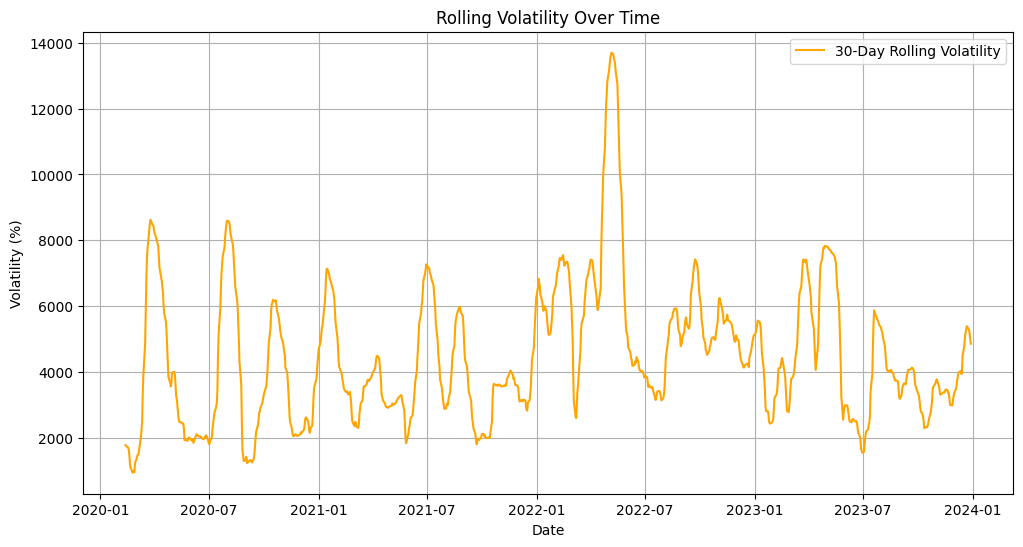

In [136]:
# 4. Rolling Volatility
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['30-Day Volatility'], label="30-Day Rolling Volatility", color="orange") # Plotting the calculated 30-Day Volatility
plt.xlabel("Date")
plt.ylabel("Volatility (%)")
plt.title("Rolling Volatility Over Time")
plt.legend()
plt.grid(True)
plt.show()

## **Buy and Sell Signal Summary**

In [137]:
import pandas as pd

# Load the processed stock data
stock_data = pd.read_csv("infosys_stock_analysis.csv")

# Convert 'Date' to a datetime object for better handling
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Ensure data is sorted by date
stock_data = stock_data.sort_values(by='Date')


# Display key columns for analysis
key_data = stock_data[['Date', 'Close', '20-Day MA', '50-Day MA', 'Signal']].tail(10)
print("Last 10 Rows of Key Data:")
print(key_data)

# Buy and Sell Signal Summary
buy_signals = stock_data[stock_data['Signal'] == 1][['Date', 'Close']]
sell_signals = stock_data[stock_data['Signal'] == -1][['Date', 'Close']]

print("\nBuy Signals (Last 5):")
print(buy_signals.tail(5))

print("\nSell Signals (Last 5):")
print(sell_signals.tail(5))

Last 10 Rows of Key Data:
          Date               Close    20-Day MA    50-Day MA  Signal
984 2023-12-18   1538.070068359375  1447.133893  1409.196382     1.0
985 2023-12-19   1532.121826171875  1453.116675  1411.429236     1.0
986 2023-12-20   1510.589599609375  1457.904858  1412.935403     1.0
987 2023-12-21     1510.1962890625  1461.749170  1414.496794     1.0
988 2023-12-22  1536.6444091796875  1467.336206  1416.204714     1.0
989 2023-12-26  1518.0128173828125  1472.574207  1417.554563     1.0
990 2023-12-27    1540.77392578125  1478.689716  1419.920664     1.0
991 2023-12-28   1536.398681640625  1483.755658  1422.866086     1.0
992 2023-12-29       1516.98046875  1488.069446  1425.364907     1.0
0          NaT             INFY.NS          NaN          NaN     NaN

Buy Signals (Last 5):
          Date               Close
988 2023-12-22  1536.6444091796875
989 2023-12-26  1518.0128173828125
990 2023-12-27    1540.77392578125
991 2023-12-28   1536.398681640625
992 2023-12-29   

## **Candlestick Chart**

In [138]:
import pandas as pd
import plotly.graph_objects as go

# Load stock data
stock_data = pd.read_csv("infosys_stock_analysis.csv")

# Convert 'Date' column to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=stock_data['Date'],  # X-axis: Dates
    open=stock_data['Open'],  # Opening prices
    high=stock_data['High'],  # High prices
    low=stock_data['Low'],    # Low prices
    close=stock_data['Close']  # Closing prices
)])

# Customize chart appearance
fig.update_layout(
    title="Candlestick Chart",
    xaxis_title="Date",
    yaxis_title="Price (INR)",
    xaxis_rangeslider_visible=False,  # Option to hide the range slider
    template="plotly_dark"  # Optional: Choose a theme
)

# Show the chart
fig.show()

## **Distribution of Monthly Stock Returns**

[*********************100%***********************]  1 of 1 completed


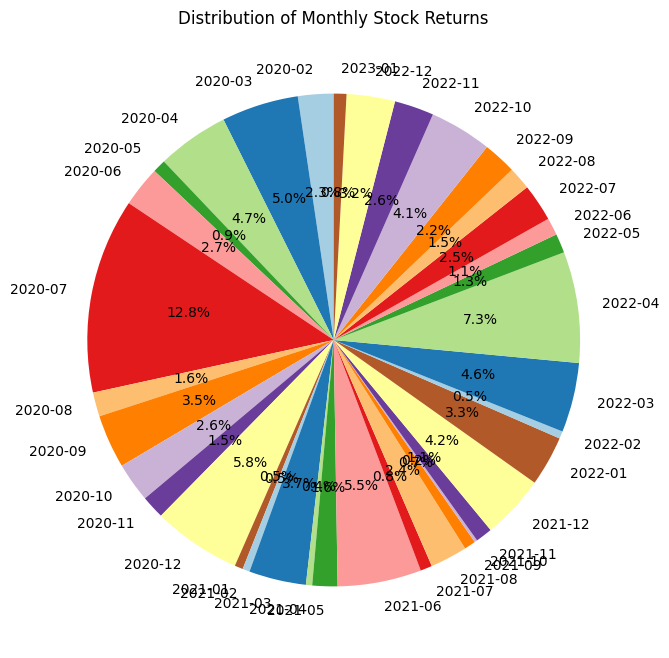

In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch stock data for one year to have multiple months
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2023-01-31")

# Ensure the DateTime index is properly formatted
stock_data.index = pd.to_datetime(stock_data.index)

# Create a 'Year-Month' column for better grouping
stock_data['Year-Month'] = stock_data.index.to_period('M')

# Calculate monthly returns
monthly_returns = stock_data.groupby('Year-Month')['Close'].last().pct_change().dropna() * 100

# Check if there's enough data for a pie chart
if len(monthly_returns) > 1:
    # Ensure all values are non-negative (absolute values)
    monthly_returns = abs(monthly_returns)

    # Pie Chart for Monthly Returns Distribution
    plt.figure(figsize=(8, 8))

    # Convert monthly_returns.values to a 1D array using flatten()
    plt.pie(monthly_returns.values.flatten(),
            labels=monthly_returns.index.astype(str),  # Convert Period to string for labels
            autopct='%1.1f%%',
            startangle=90,
            colors=plt.cm.Paired.colors)

    plt.title("Distribution of Monthly Stock Returns")
    plt.show()
else:
    print("Not enough data for a pie chart. Try fetching more months of data.")

## **Stock Price**

[*********************100%***********************]  1 of 1 completed


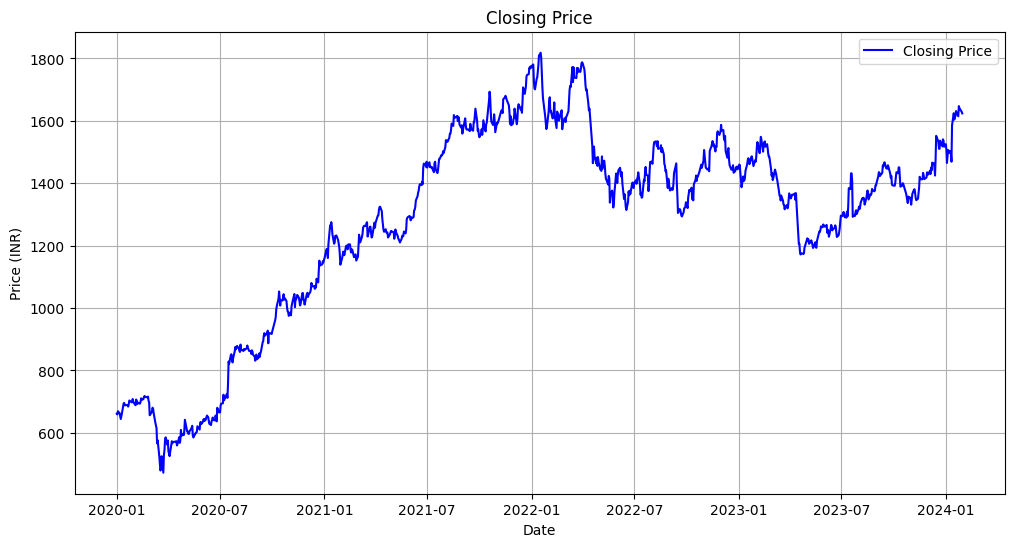

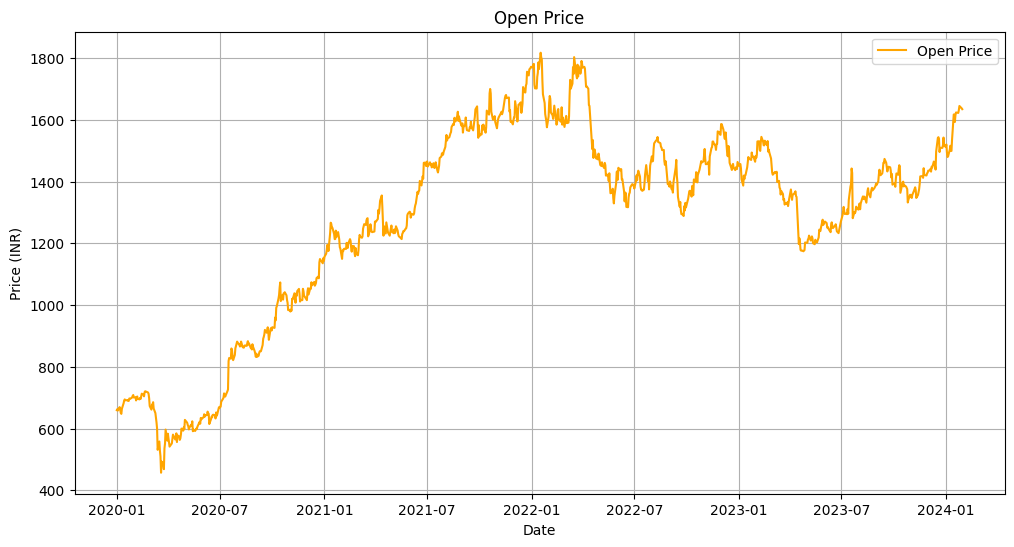

In [140]:
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch stock data
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2024-01-31")

# Plot Line Chart for Closing Price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.title("Closing Price")
plt.grid(True)
plt.legend()
plt.show()

#  Plot Line Chart for Open Price
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Open'], label="Open Price", color='orange')
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.title("Open Price")
plt.grid(True)
plt.legend()
plt.show()

## **SMA & EMA Analysis**

[*********************100%***********************]  1 of 1 completed


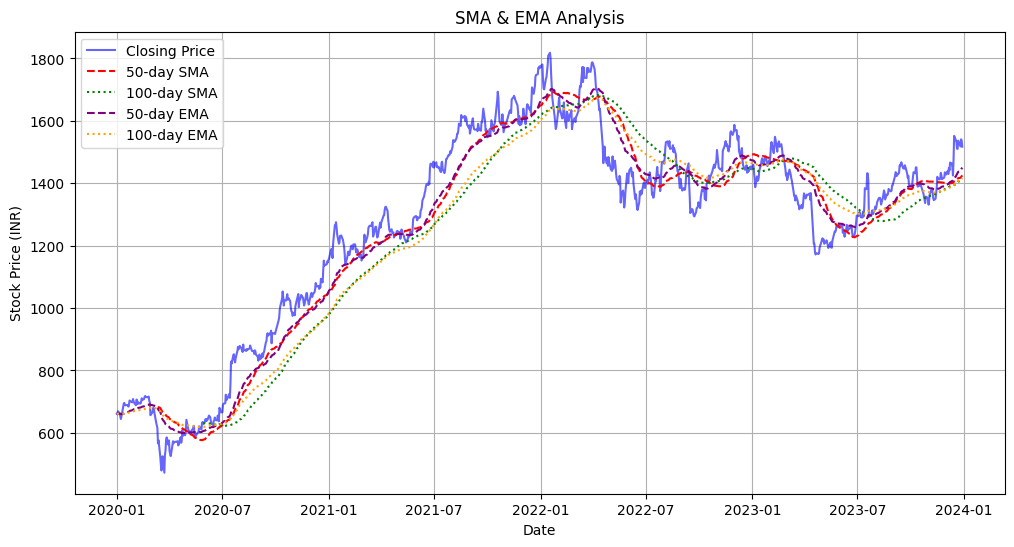

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch stock data
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2023-12-31")

# Ensure the index is in DateTime format
stock_data.index = pd.to_datetime(stock_data.index)

# Calculate Simple Moving Averages (SMA) for 50-day and 100-day windows
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['SMA_100'] = stock_data['Close'].rolling(window=100).mean()

# Calculate Exponential Moving Averages (EMA) for 50-day and 100-day windows
stock_data['EMA_50'] = stock_data['Close'].ewm(span=50, adjust=False).mean()
stock_data['EMA_100'] = stock_data['Close'].ewm(span=100, adjust=False).mean()

# Plot the closing price with SMA and EMA
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(stock_data['SMA_50'], label='50-day SMA', color='red', linestyle='dashed')
plt.plot(stock_data['SMA_100'], label='100-day SMA', color='green', linestyle='dotted')
plt.plot(stock_data['EMA_50'], label='50-day EMA', color='purple', linestyle='dashed')
plt.plot(stock_data['EMA_100'], label='100-day EMA', color='orange', linestyle='dotted')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('SMA & EMA Analysis')
plt.legend()
plt.grid()
plt.show()


## **Daily Returns**

[*********************100%***********************]  1 of 1 completed


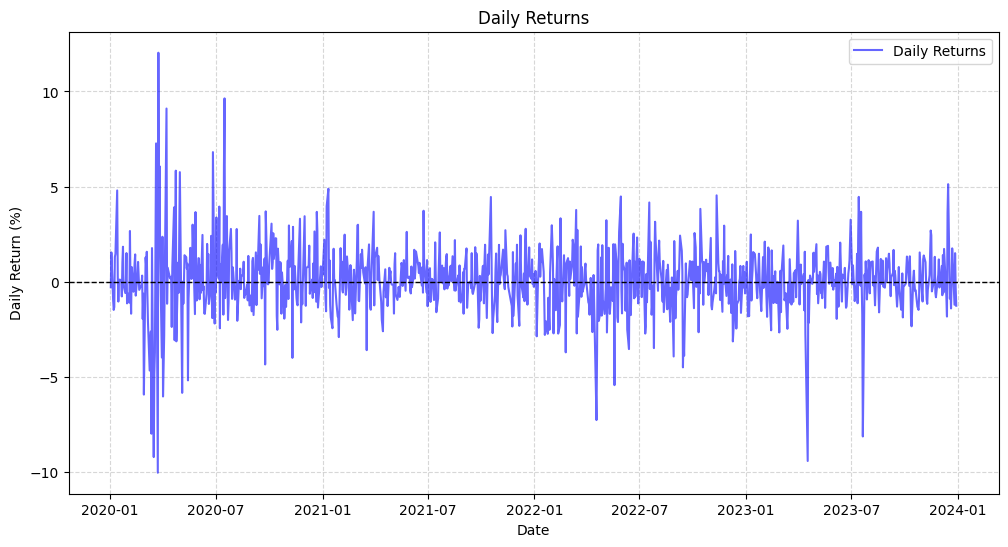

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch stock data
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2023-12-31")

# Calculate daily returns
stock_data['Daily Returns'] = stock_data['Close'].pct_change() * 100  # Convert to percentage

# Drop NaN values (first row will be NaN)
stock_data.dropna(inplace=True)

# Plot Daily Returns
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Daily Returns'], color='blue', alpha=0.6, label="Daily Returns")

# Add grid, labels, and title
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Add a horizontal line at 0%
plt.xlabel("Date")
plt.ylabel("Daily Return (%)")
plt.title("Daily Returns")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

## **Volatility Analysis (Rolling Standard Deviation)**

[*********************100%***********************]  1 of 1 completed


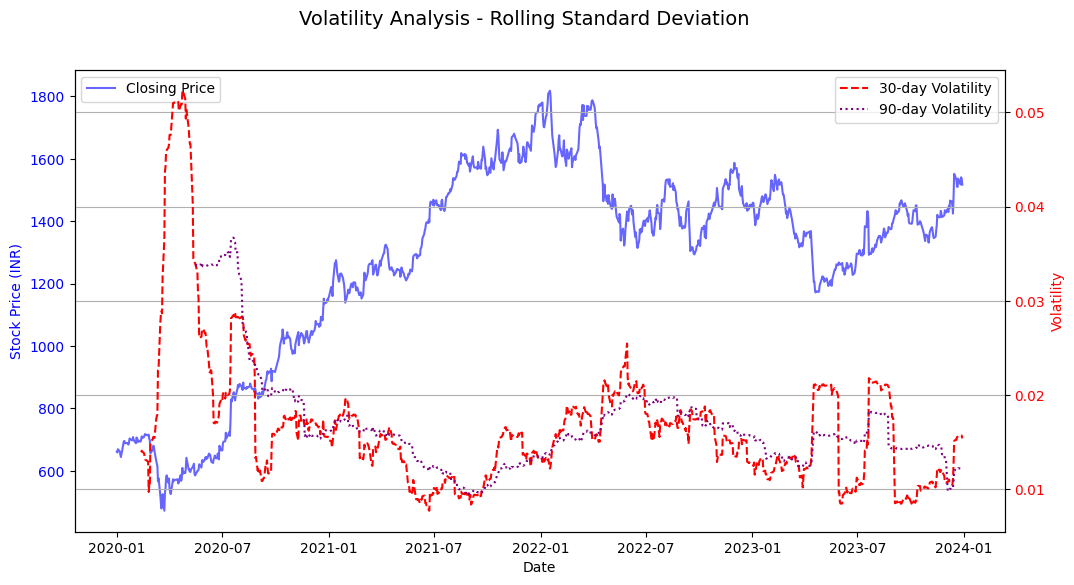

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Fetch stock data
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2023-12-31")

# Ensure DateTime format
stock_data.index = pd.to_datetime(stock_data.index)

# Calculate Daily Returns
stock_data['Daily Returns'] = stock_data['Close'].pct_change()

# Calculate Rolling Volatility (Standard Deviation of Returns)
stock_data['Volatility_30'] = stock_data['Daily Returns'].rolling(window=30).std()
stock_data['Volatility_90'] = stock_data['Daily Returns'].rolling(window=90).std()

# Plot Closing Price & Rolling Volatility
fig, ax1 = plt.subplots(figsize=(12, 6))

# First y-axis: Stock Closing Price
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price (INR)', color='blue')
ax1.plot(stock_data['Close'], label='Closing Price', color='blue', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='blue')
# Second y-axis: Rolling Volatility
ax2 = ax1.twinx()
ax2.set_ylabel('Volatility', color='red')
ax2.plot(stock_data['Volatility_30'], label='30-day Volatility', color='red', linestyle='dashed')
ax2.plot(stock_data['Volatility_90'], label='90-day Volatility', color='purple', linestyle='dotted')
ax2.tick_params(axis='y', labelcolor='red')

# Title and Legends
fig.suptitle('Volatility Analysis - Rolling Standard Deviation', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.grid()
plt.show()

## **Gantt Chart**

In [147]:
# Step 1: Download Infosys stock data
stock_data = yf.download("INFY.NS", start="2020-01-01", end="2023-12-31")
stock_data.reset_index(inplace=True)

# Step 2: Calculate Moving Averages
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

# Step 3: Generate Buy/Sell Signals based on crossover
stock_data['Signal'] = 0
stock_data.loc[stock_data['SMA_20'] > stock_data['SMA_50'], 'Signal'] = 1
stock_data['Position'] = stock_data['Signal'].diff()

# Step 4: Extract buy/sell dates
buy_dates = stock_data[stock_data['Position'] == 1]['Date'].reset_index(drop=True)
sell_dates = stock_data[stock_data['Position'] == -1]['Date'].reset_index(drop=True)

# Ensure we have equal pairs for Gantt segments
min_len = min(len(buy_dates), len(sell_dates))
buy_dates = buy_dates[:min_len]
sell_dates = sell_dates[:min_len]

# Step 5: Build Gantt chart DataFrame
gantt_df = pd.DataFrame({
    'Task': [f"Holding {i+1}" for i in range(min_len)],
    'Start': buy_dates,
    'Finish': sell_dates
})

# Step 6: Create Gantt Chart
fig = px.timeline(gantt_df, x_start="Start", x_end="Finish", y="Task", color="Task")
fig.update_layout(
    title="Gantt Chart of Buy-Hold-Sell Periods",
    xaxis_title="Date",
    yaxis_title="Holding Period",
    template="plotly_dark"
)
fig.update_yaxes(autorange="reversed")
fig.show()

[*********************100%***********************]  1 of 1 completed


# **Results and Analysis**